## Fetch Data and Data Cleaning

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read data
data = pd.read_csv('Daily_Demand_Forecasting_Orders.csv', header=0)
data.head()

,Week of the month (first week,second,third,fourth or fifth week;Day of the week (Monday to Friday);Non-urgent order;Urgent order;Order type A;Order type B;Order type C;Fiscal sector orders;Orders from the traffic controller sector;Banking orders (1);Banking orders (2);Banking orders (3);Target (Total orders)
0,1;4;316.307;223.270;61.543;175.586;302.448;0;6...,NaN,NaN,NaN
1,1;5;128.633;96.042;38.058;56.037;130.580;0;404...,NaN,NaN,NaN
2,1;6;43.651;84.375;21.826;25.125;82.461;1.386;1...,NaN,NaN,NaN
3,2;2;171.297;127.667;41.542;113.294;162.284;18....,NaN,NaN,NaN
4,2;3;90.532;113.526;37.679;56.618;116.220;6.459...,NaN,NaN,NaN


there was not use a suitable delimiter in the csv file therefore, we need to read the data using different strategies and reorganize the dataset

In [3]:
# reach first column that have all the values and split the values for other columns
data = pd.DataFrame(data.iloc[:, 0].str.split(";", expand=True))
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,4,316.307,223.270,61.543,175.586,302.448,0,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517


In [4]:
# dataset is ready to save
# save the dataset with column names as csv file
headers = ["Week", "Day", "NUrgentOrder", "UrgentOrder", "OrderA", "OrderB",
           "OrderC", "FiscalOrders", "TrafficOrders", "Bank1Orders",
           "Bank2Orders", "Bank3Orders", "Target"]
data.to_csv('Forecasting_Orders.csv', index=False, header=headers)

In [5]:
# read the organized data 
data = pd.read_csv('Forecasting_Orders.csv')
data.head()

,Week,Day,NUrgentOrder,UrgentOrder,OrderA,OrderB,OrderC,FiscalOrders,TrafficOrders,Bank1Orders,Bank2Orders,Bank3Orders,Target
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517


In [6]:
# change Week and Day column as
# Week of the month (1: first, 2:   second, 3: third, 4: fourth, 5:fifth)
# Day of the week (2: Monday, 3:   Tuesday, 4: Wednesday, 5:Thursday, 6:Friday)

Week_names = []
for i in data["Week"]:
    if i == 1:
        i = "First Week"
        Week_names.append(i)
    elif i == 2:
        i = "Second Week"
        Week_names.append(i)
    elif i == 3:
        i = "Third Week"
        Week_names.append(i)
    elif i == 4:
        i = "Fourth Week"
        Week_names.append(i)
    else:
        i = "Fifth Week"
        Week_names.append(i)
data["Week"] = Week_names

Day_names = []
for i in data["Day"]:
    if i == 2:
        i = "Monday"
        Day_names.append(i)
    elif i == 3:
        i = "Tuesday"
        Day_names.append(i)
    elif i == 4:
        i = "Wednesday"
        Day_names.append(i)
    elif i == 5:
        i = "Thursday"
        Day_names.append(i)
    else:
        i = "Friday"
        Day_names.append(i)
data["Day"] = Day_names
data.head()

,Week,Day,NUrgentOrder,UrgentOrder,OrderA,OrderB,OrderC,FiscalOrders,TrafficOrders,Bank1Orders,Bank2Orders,Bank3Orders,Target
0,First Week,Wednesday,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,First Week,Thursday,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,First Week,Friday,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,Second Week,Monday,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,Second Week,Tuesday,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517


In [7]:
# check the null data
data.isnull().sum()

Week             0
Day              0
NUrgentOrder     0
UrgentOrder      0
OrderA           0
OrderB           0
OrderC           0
FiscalOrders     0
TrafficOrders    0
Bank1Orders      0
Bank2Orders      0
Bank3Orders      0
Target           0
dtype: int64

## Explotary Data Analysis and Data Visualization

In [8]:
# information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Week           60 non-null     object 
 1   Day            60 non-null     object 
 2   NUrgentOrder   60 non-null     float64
 3   UrgentOrder    60 non-null     float64
 4   OrderA         60 non-null     float64
 5   OrderB         60 non-null     float64
 6   OrderC         60 non-null     float64
 7   FiscalOrders   60 non-null     float64
 8   TrafficOrders  60 non-null     int64  
 9   Bank1Orders    60 non-null     int64  
 10  Bank2Orders    60 non-null     int64  
 11  Bank3Orders    60 non-null     int64  
 12  Target         60 non-null     float64
dtypes: float64(7), int64(4), object(2)
memory usage: 6.2+ KB


In [9]:
# statistical information about data
data.describe()

,NUrgentOrder,UrgentOrder,OrderA,OrderB,OrderC,FiscalOrders,TrafficOrders,Bank1Orders,Bank2Orders,Bank3Orders,Target
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,172.554933,118.920850,52.112217,109.229850,139.531250,77.396133,44504.350000,46640.833333,79401.483333,23114.633333,300.873317
std,69.505788,27.170929,18.829911,50.741388,41.442932,186.502470,12197.905134,45220.736293,40504.420041,13148.039829,89.602041
min,43.651000,77.371000,21.826000,25.125000,74.372000,0.000000,11992.000000,3452.000000,16411.000000,7679.000000,129.412000
25%,125.348000,100.888000,39.456250,74.916250,113.632250,1.243250,34994.250000,20130.000000,50680.500000,12609.750000,238.195500
50%,151.062500,113.114500,47.166500,99.482000,127.990000,7.831500,44312.000000,32527.500000,67181.000000,18011.500000,288.034500
75%,194.606500,132.108250,58.463750,132.171000,160.107500,20.360750,52111.750000,45118.750000,94787.750000,31047.750000,334.237250
max,435.304000,223.270000,118.178000,267.342000,302.448000,865.000000,71772.000000,210508.000000,188411.000000,73839.000000,616.453000


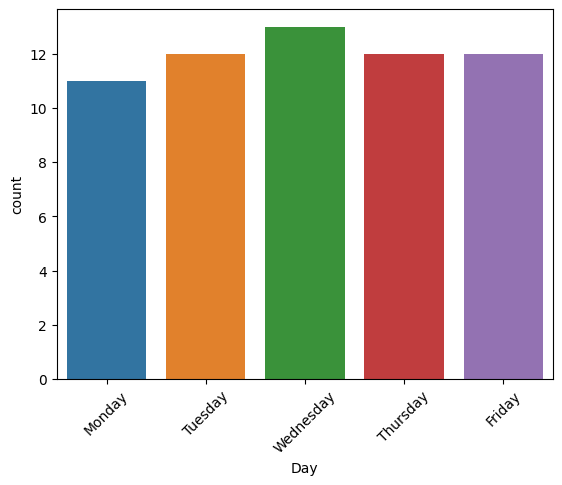

In [10]:
sns.countplot(x="Day", data=data, order=['Monday','Tuesday','Wednesday','Thursday','Friday'])
plt.xticks(rotation = 45)
plt.show()

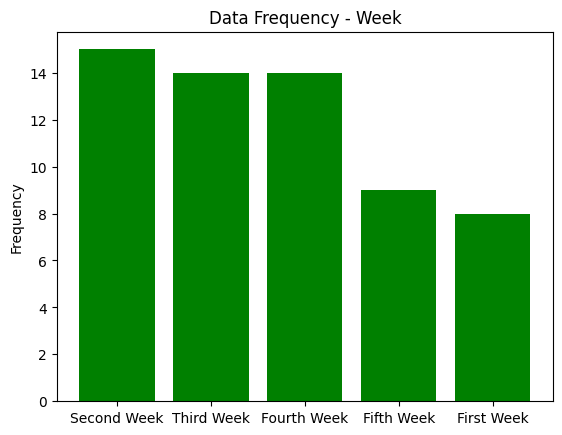

Number of Week 
Second Week    15
Third Week     14
Fourth Week    14
Fifth Week      9
First Week      8
Name: Week, dtype: int64


In [11]:
# Number of Sample according to Week
plt.figure()
plt.bar(data["Week"].value_counts().index, data["Week"].value_counts(), color = "g",)
#plt.xticks(data["Week"].values)
plt.ylabel("Frequency")
plt.title("Data Frequency - Week")
plt.show()
print(f"Number of Week \n{data['Week'].value_counts()}")

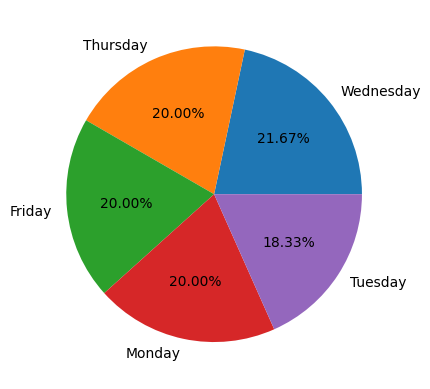

In [12]:
# plot a pie chart and see percentages of Days
plt.pie(data['Day'].value_counts(), labels=data['Day'].unique(), autopct='%1.2f%%',)
plt.show() 

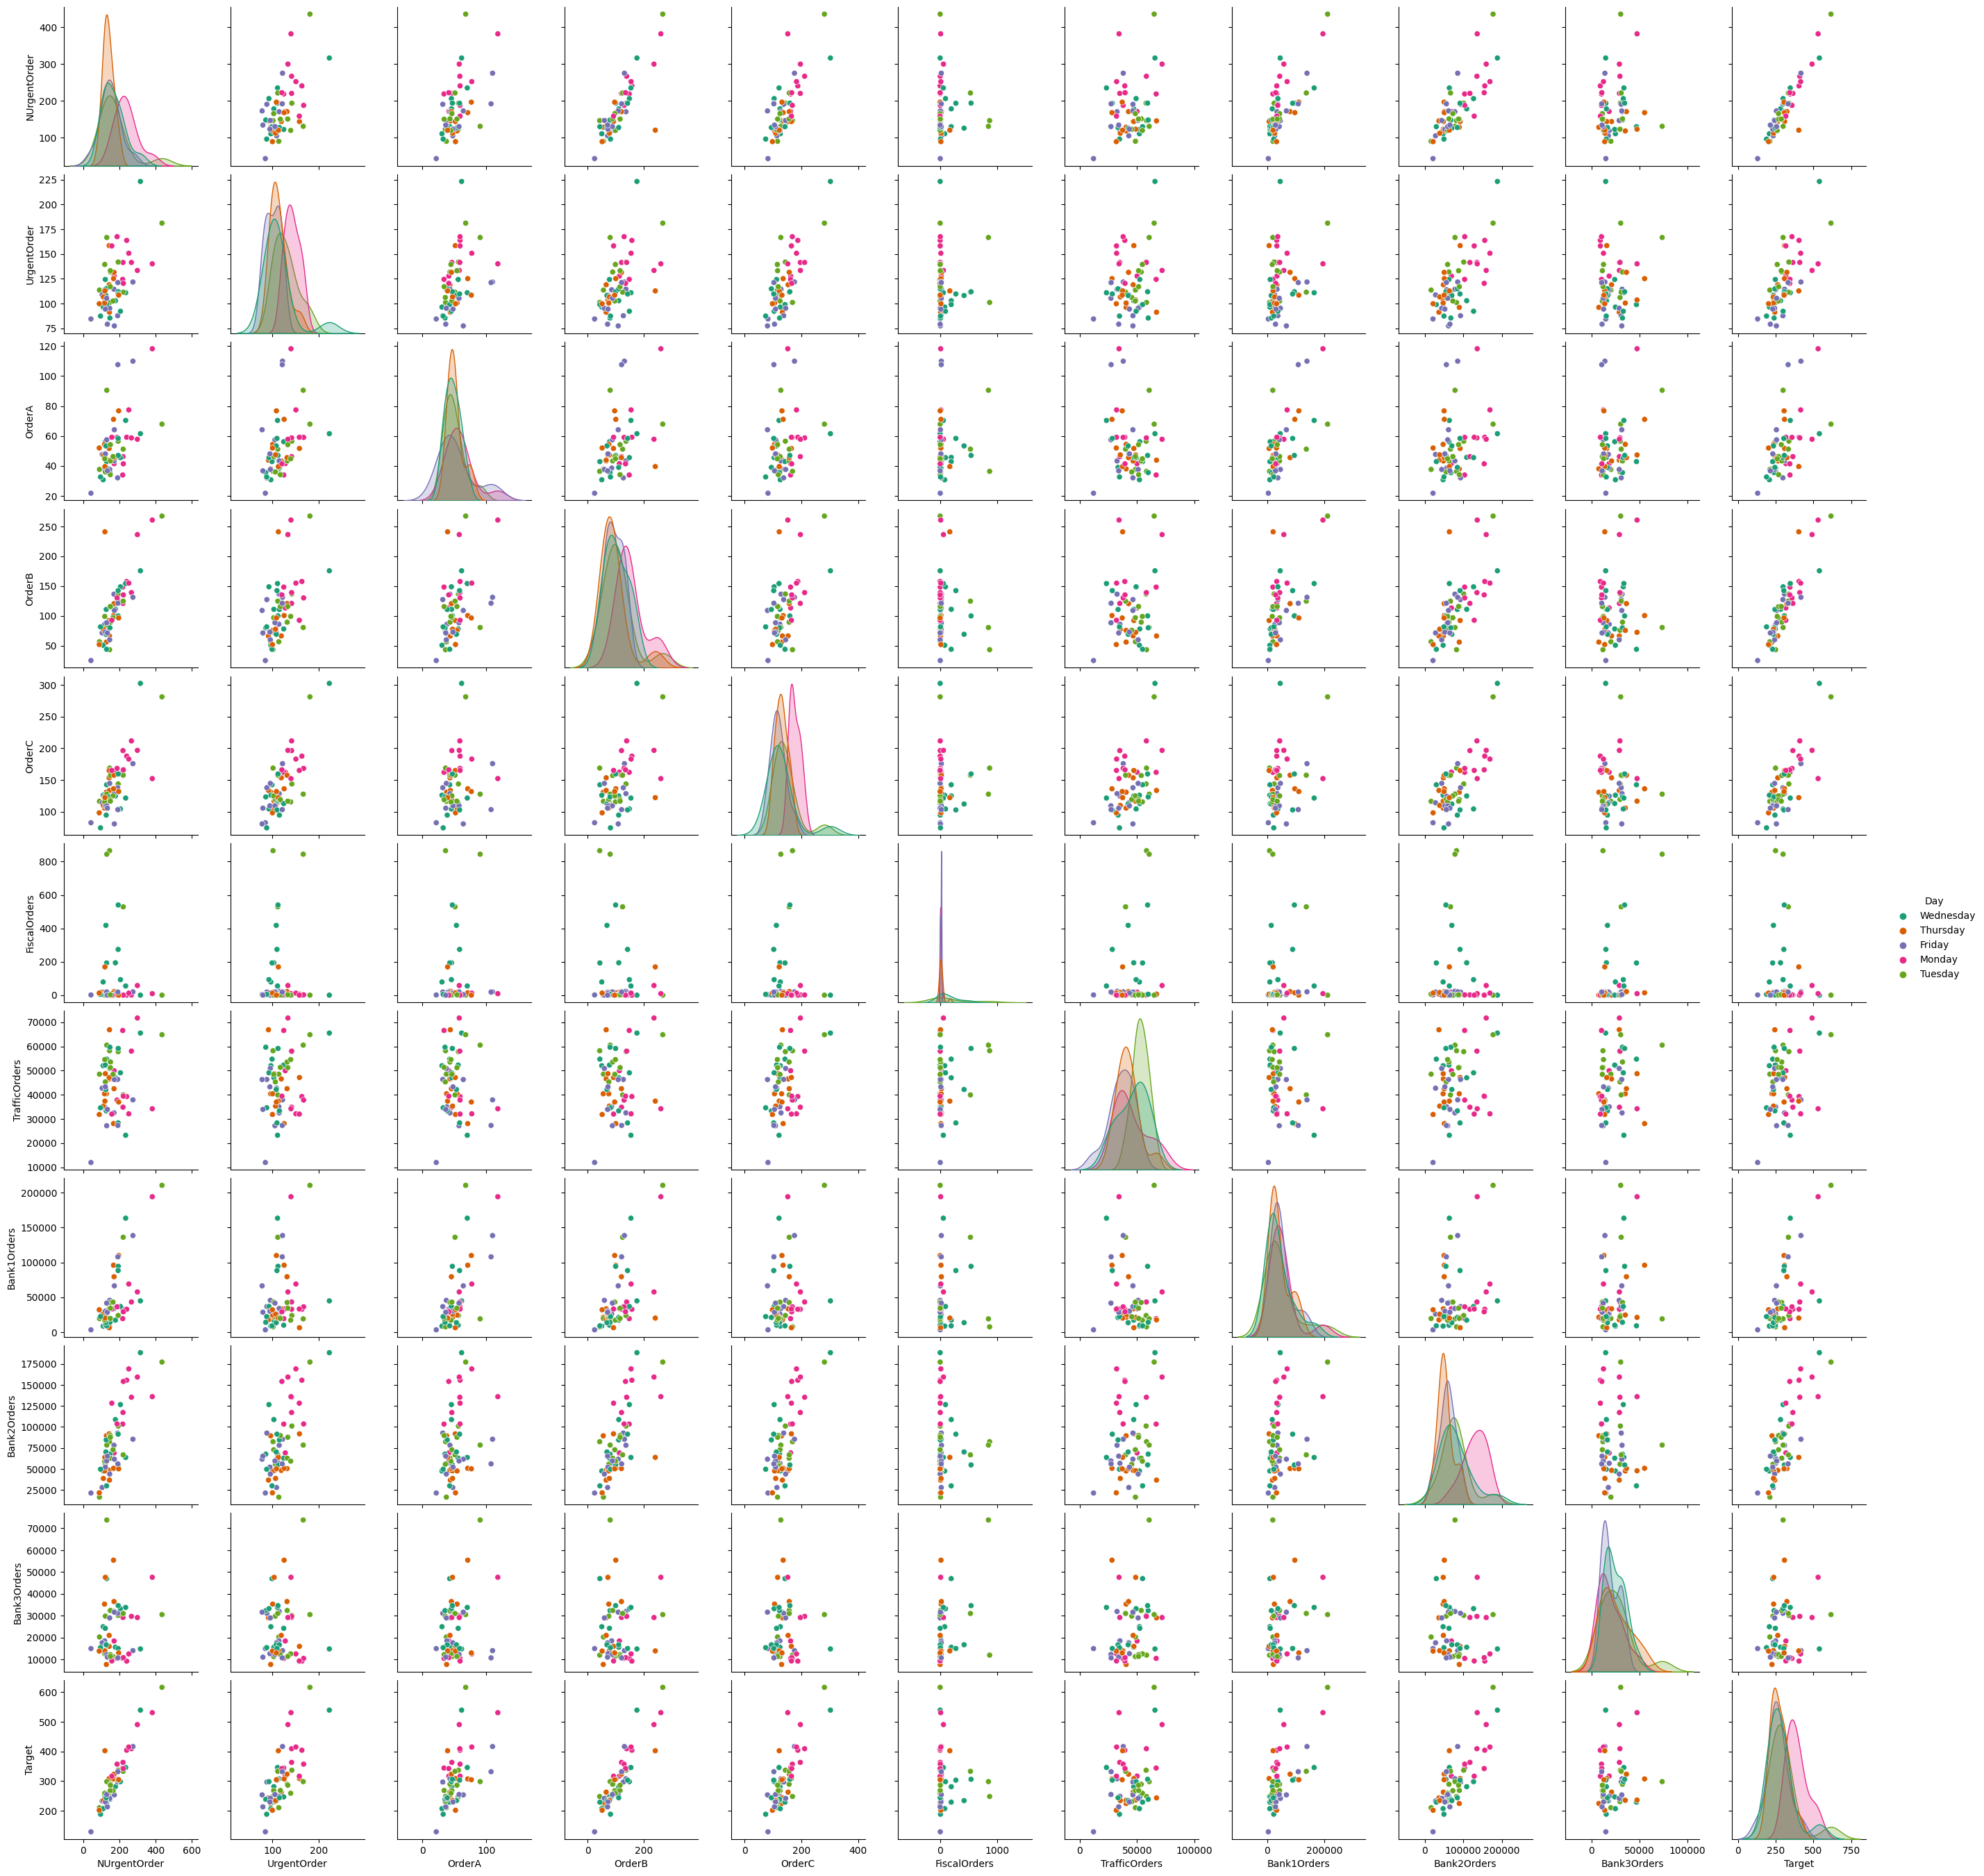

In [13]:
# see pairplot for relation between the columns
sns.pairplot(data, hue="Day", palette='Dark2')
plt.show()

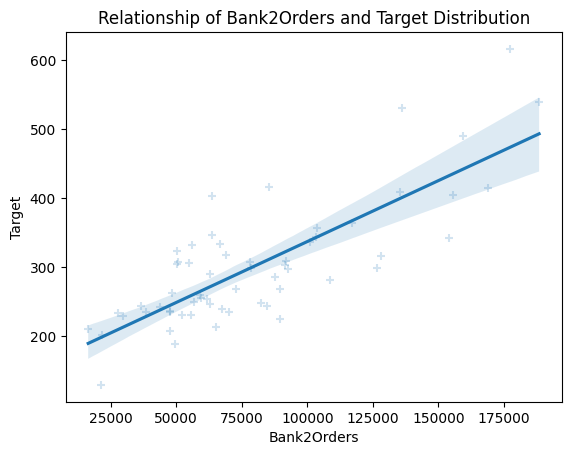

In [14]:
sns.regplot(x='Bank2Orders', y='Target', data=data, marker="+", scatter_kws={'alpha':0.2})
plt.title('Relationship of Bank2Orders and Target Distribution')
plt.show()

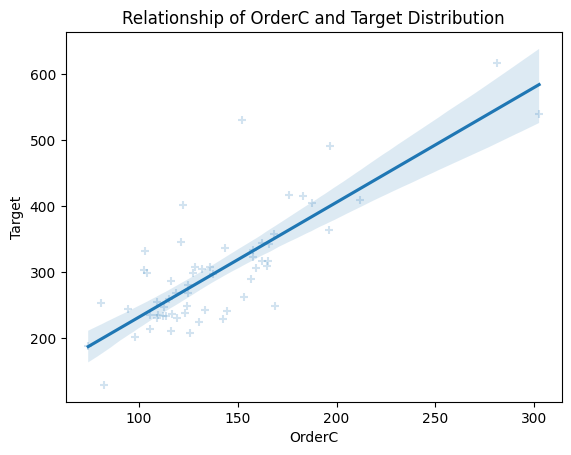

In [15]:
sns.regplot(x='OrderC', y='Target', data=data, marker="+", scatter_kws={'alpha':0.2})
plt.title('Relationship of OrderC and Target Distribution')
plt.show()

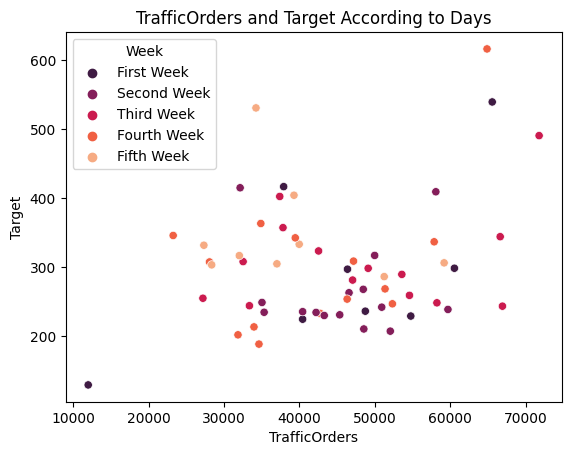

In [16]:
sns.scatterplot(x='TrafficOrders', y='Target', hue='Week', data=data, palette = "rocket")
plt.title('TrafficOrders and Target According to Days')
plt.show()

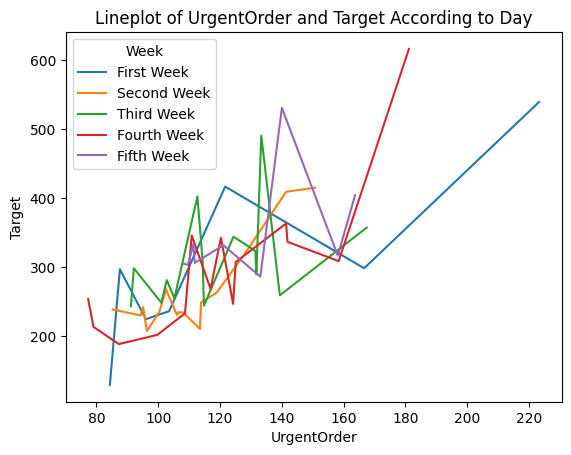

In [17]:
sns.lineplot(x='UrgentOrder', y='Target', hue='Week', data=data,)
plt.title('Lineplot of UrgentOrder and Target According to Day')
plt.show()

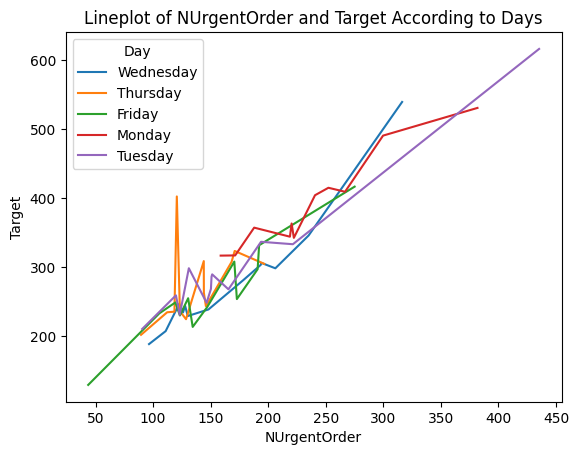

In [18]:
sns.lineplot(x='NUrgentOrder', y='Target', hue='Day', data=data,)
plt.title('Lineplot of NUrgentOrder and Target According to Days')
plt.show()

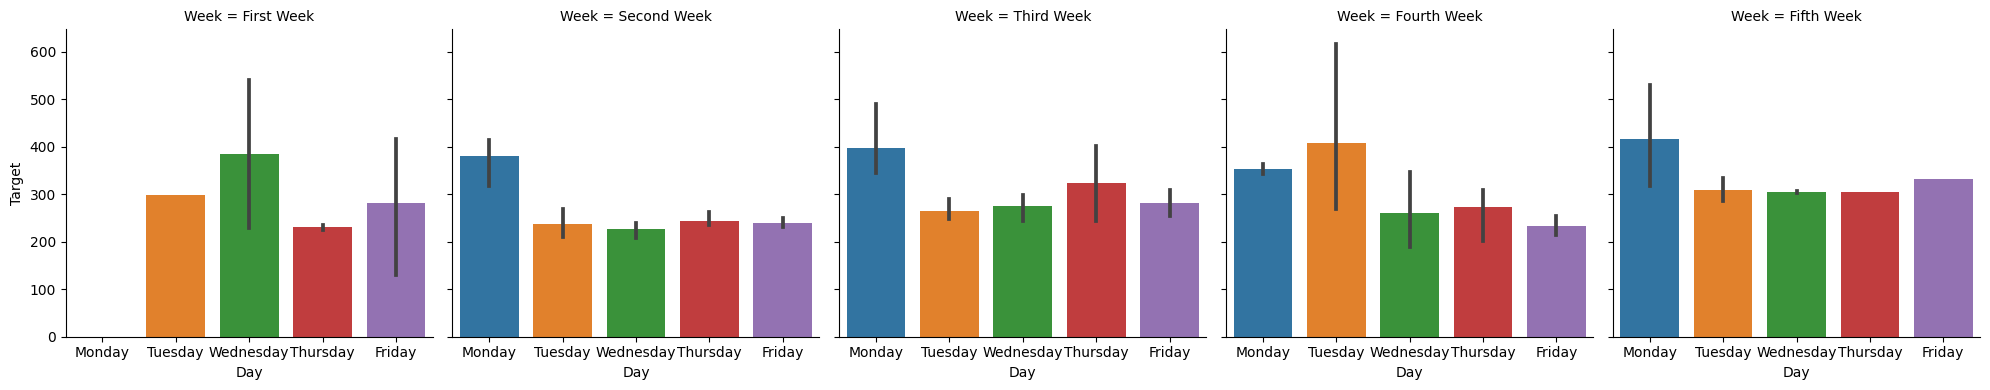

In [19]:
sns.catplot(x="Day", y="Target", col="Week",
            data=data, kind="bar", height=4, order=['Monday','Tuesday','Wednesday','Thursday','Friday'],)
plt.show()

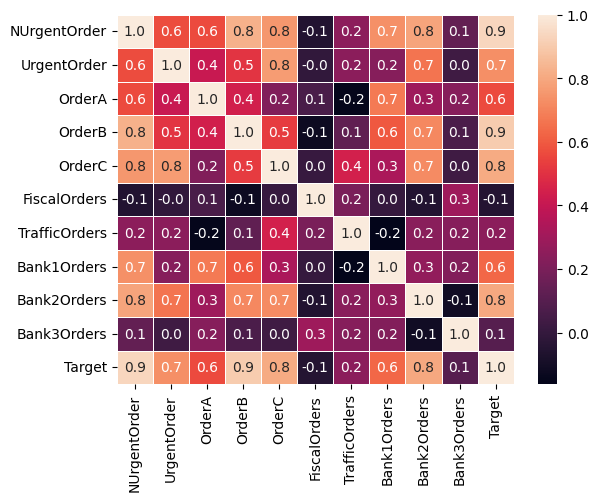

In [20]:
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f')
plt.show()

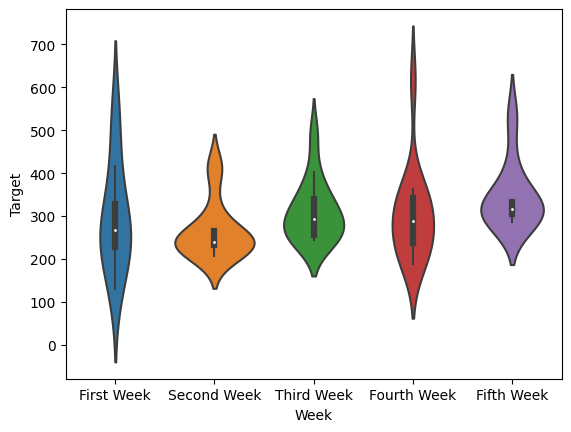

In [21]:
sns.violinplot(x="Week", y="Target", data=data)
plt.show()

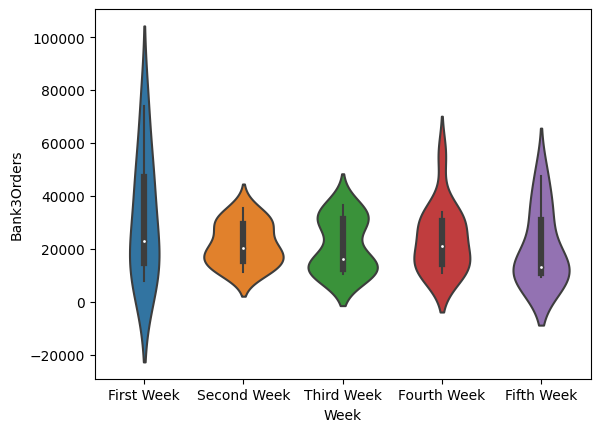

In [22]:
sns.violinplot(x="Week", y="Bank3Orders", data=data)
plt.show()

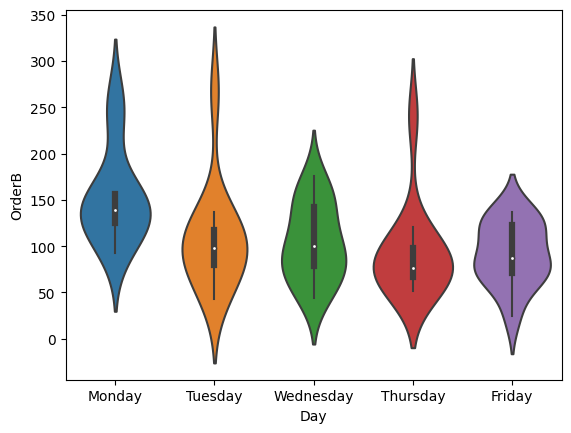

In [23]:
sns.violinplot(x="Day", y="OrderB", data=data, order=['Monday','Tuesday','Wednesday','Thursday','Friday'])
plt.show()

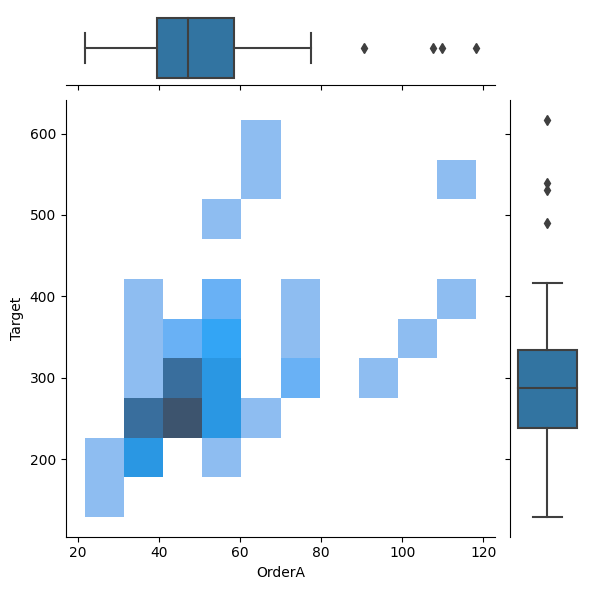

In [24]:
g = sns.JointGrid(data=data, x="OrderA", y="Target")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)
plt.show()

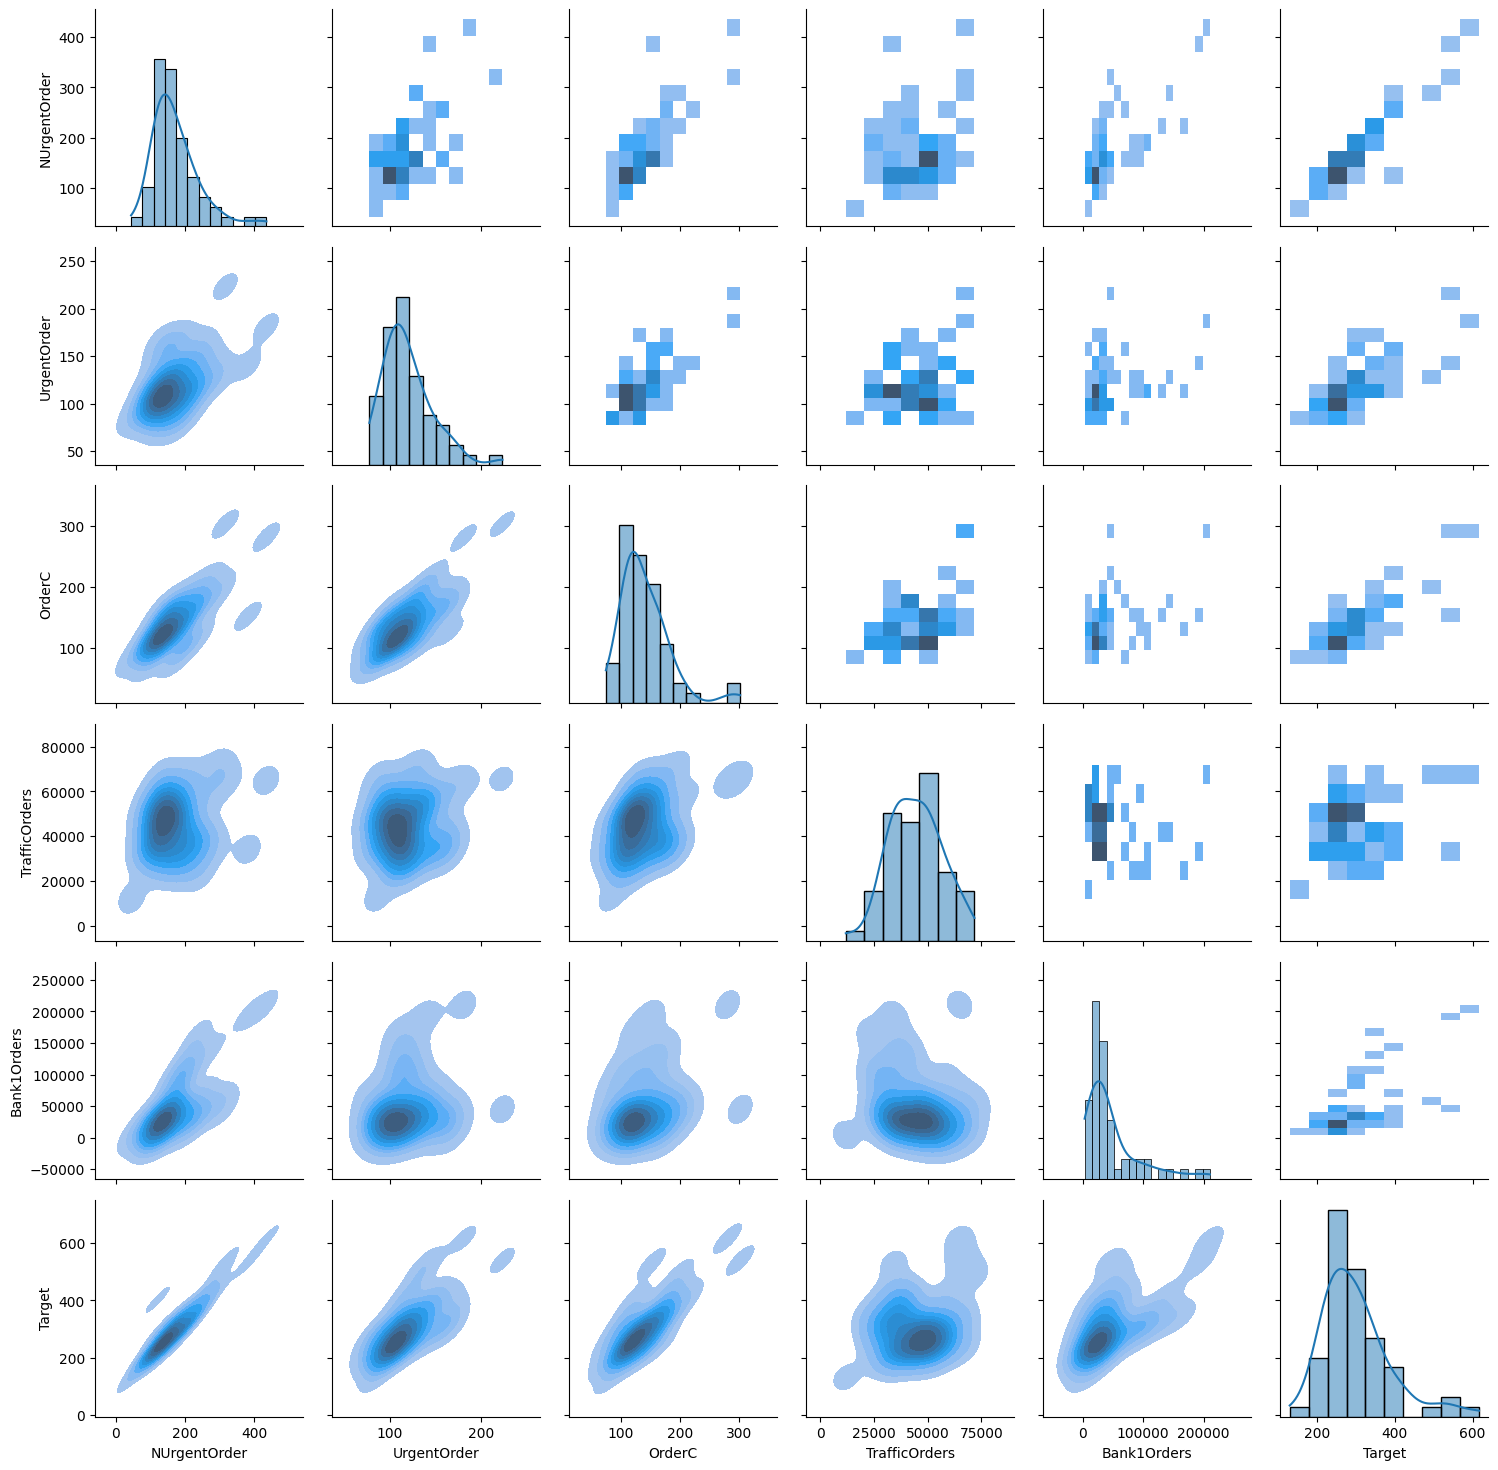

In [25]:
g = sns.PairGrid(data[["NUrgentOrder", "UrgentOrder", "OrderC", "TrafficOrders", 
                       "Bank1Orders", "Target"]])
g.map_upper(sns.histplot) 
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)
plt.show()

## Preprocessing

In [26]:
from sklearn.preprocessing import LabelEncoder
# define a function for label encoding
def labelEncoder(labelColumn):
    labelValues = labelColumn
    unique_labels = labelColumn.unique()
    le = LabelEncoder()
    labelColumn = le.fit_transform(labelColumn)
    print('Encoding Approach:')
    for i, j in zip(unique_labels, labelColumn[np.sort(np.unique(labelColumn, return_index=True)[1])]): 
        print(f'{i}  ==>  {j}')
    return labelColumn

In [27]:
categorical_variables = ["Day", "Week"]
for i in categorical_variables:
    print(f"For {i} column ")
    data[f"{i}"] = labelEncoder(data[f"{i}"])
    print("**********************************")

For Day column 
Encoding Approach:
Wednesday  ==>  4
Thursday  ==>  2
Friday  ==>  0
Monday  ==>  1
Tuesday  ==>  3
**********************************
For Week column 
Encoding Approach:
First Week  ==>  1
Second Week  ==>  3
Third Week  ==>  4
Fourth Week  ==>  2
Fifth Week  ==>  0
**********************************


In [28]:
# create input and output
X = data.drop('Target', axis = 1)
y = data['Target']

In [29]:
# for train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=128)

# see train and test dataset shape
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (51, 12)
y_train: (51,)
X_test: (9, 12)
y_test: (9,)


## Model Training and Evaluation

In [30]:
# import libraries
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# make a function that include all regression models
def allRegressors(X_train, X_test, y_train, y_test):
    """
    This function use multiple machine learning regressors and show us the results of them 
    :param X_train: train input
    :param X_test: test input
    :param y_train: train output
    :param y_test: test output
    :return: Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) for each regressors and
    comparison plot for regressors according to RMSE and MAE
    """
    Regressors = [LinearRegression(), SVR(), RandomForestRegressor(), GradientBoostingRegressor(),
                   KNeighborsRegressor(), DecisionTreeRegressor()]
    mae_dict = {}
    mae_scores = []
    rmse_dict = {}
    rmse_scores = []
    
    # function for mean absolute error
    def maeScore(regressor):
        """
        :param regressor: regressor model function
        :return: mean absolute error for regressor
        """
        
        clf = regressor.fit(X_train, y_train)
        pred = clf.predict(X_test)
        mae_score = mean_absolute_error(y_test, pred)
        return mae_score
    
    # function for root mean square error
    def rmseScore(regressor):
        """
        :param regressor: regressor model function
        :return: root mean score error for regressor
        """
        
        clf = regressor.fit(X_train, y_train)
        pred = clf.predict(X_test)
        rmse_score = np.sqrt(mean_squared_error(y_test, pred))
        return rmse_score
    
    # mean absolute error, root mean square error for each regressors
    for regressor in Regressors:
        name = regressor.__class__.__name__
        mae_dict[name] = maeScore(regressor)
        mae_scores.append(maeScore(regressor))
        rmse_dict[name] = rmseScore(regressor)
        rmse_scores.append(rmseScore(regressor))
        print("*************************************************************************")
        print(f"{name} Mean Absolute Error = {mae_dict[name]}")
        print(f"{name} Root Mean Square Error = {rmse_dict[name]}")
        
    #Plotting the performance of regressors
    def plotPerformance(scores_list, scores_dict, metric:str):
        """
        :param scores_list: list that include evaluation scores 
        :param scores_dict: dictionary that include regressors and evaluation scores
        :param metric: metric name y axis 
        :return: plot of performance comparison of regressors
        """
        
        N = len(Regressors)
        w = 0.5
        x = np.arange(N)
        plt.bar(x, scores_list, width = w, align = 'center', color="g")
        plt.xlabel("Regressors")
        plt.title("Performance Comparison of Regressors")
        plt.ylabel(f"{metric} Error")
        plt.xticks(x,
                   scores_dict.keys(),
                   rotation=90)
        plt.yticks(np.arange(0, np.max(scores_list), np.max(scores_list)/len(scores_list)))
        plt.show()
    
    # call the function
    plotPerformance(mae_scores, mae_dict, "Mean Absolute")
    plotPerformance(rmse_scores, rmse_dict, "Root Mean Square")

*************************************************************************
LinearRegression Mean Absolute Error = 1.4400332778071363e-12
LinearRegression Root Mean Square Error = 1.8340752226792675e-12
*************************************************************************
SVR Mean Absolute Error = 77.24592795429635
SVR Root Mean Square Error = 97.26063945897107
*************************************************************************
RandomForestRegressor Mean Absolute Error = 20.4726066666667
RandomForestRegressor Root Mean Square Error = 28.581999538825173
*************************************************************************
GradientBoostingRegressor Mean Absolute Error = 26.452390651156865
GradientBoostingRegressor Root Mean Square Error = 38.23150896053204
*************************************************************************
KNeighborsRegressor Mean Absolute Error = 29.387355555555573
KNeighborsRegressor Root Mean Square Error = 44.680530680873126
************************

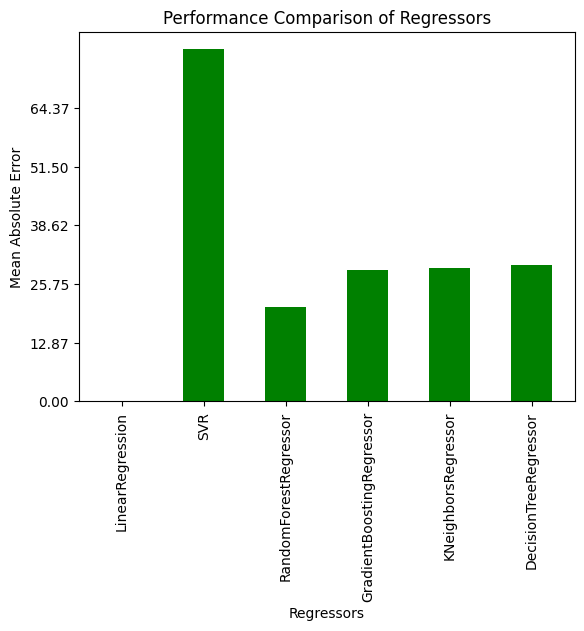

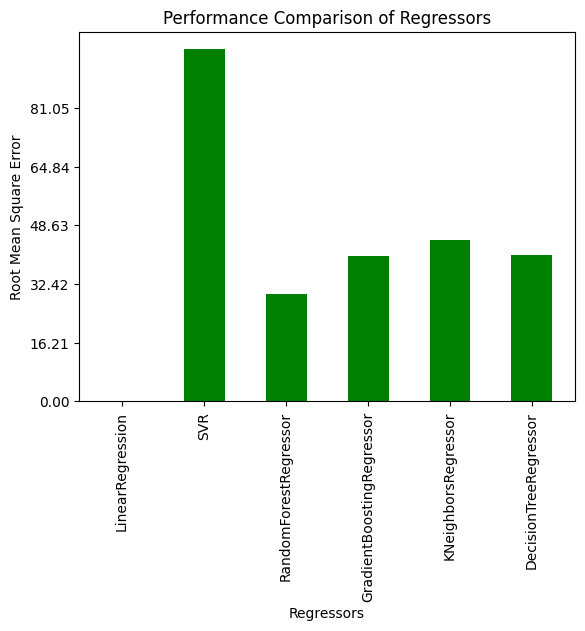

In [31]:
allRegressors(X_train, X_test, y_train, y_test)

## Model Selection and Parameter Optimization

In [32]:
# Random Hyperparameter Grid
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [33]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100,
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [34]:
# see best parameters
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [35]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 29.2607 degrees.
Accuracy = 87.66%.


In [36]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 28.4331 degrees.
Accuracy = 87.90%.


In [37]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.27%.


In [38]:
# Grid Search with Cross Validation
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [39]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [40]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Average Error: 26.2508 degrees.
Accuracy = 87.87%.


In [41]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.23%.
